### Examining Purity

**Expected Time = 60 minutes**

**Total Points = 50**

By default, the metric in the `DecisionTreeClassifier` is the Gini Criterion.  This assigment introduces its use through a basic example.  Your goal is to minimize the impurity based on a range of split options.  In the following assignment you will explore the alternative notion of `entropy` that can also be used as a criterion.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

### Gini Impurity

The Gini Criterion is used to identify the optimal place to make a decision for classification based on the purity of the results.  This is measured by a weighted sum of the node size and gini impurity of each split node defined as:

$$\sum_{k}p_{mk}(1 - p_{mk})$$

where 

$$p_{mk} = \frac{1}{N_m} \sum_{y \in Q_m} I(y = k)$$

and $Q_m$ is the data at node $m$ with $N_m$ samples.  [source](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)

### The Data

### Below, a small sample from the built in `titanic` dataset is loaded and displayed.  The classification problem is to predict survival on the ship.  You will use the `age` (age of passenger) and `pclass` (passenger class) features to explore the gini splitting criterion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

In [3]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


The **GINI IMPURITY** of the original data is:

$$ 1 - (\frac{3}{5})^2 - (\frac{2}{5})^2$$

In [4]:
1 - (3/5)**2 - (2/5)**2

0.48

### Problem 1

#### Split on Passenger Class

**10 points**

To begin, consider the information in the data based on splitting the `pclass` column.  Compute the Gini Impurity of the left and right side of the split as `gini_pclass1` and `gini_pclass3` below.  Remember that to compute the gini impurity means:

$$1 - P(\text{survived})^2 - P(\text{neither survived})^2$$

In [5]:
### GRADED

gini_pclass1 = ''
gini_pclass3 = ''

### BEGIN SOLUTION
gini_pclass1 = 1 - 1 - 0
gini_pclass3 = 1 - (2/3)**2 - (1/3)**2
### END SOLUTION

# Answer check
print(f'Left node: {gini_pclass1: .2f}\nRight Node: {gini_pclass3: .2f}')

Left node:  0.00
Right Node:  0.44


In [6]:
### BEGIN HIDDEN TESTS
gini_pclass1_ = 1 - 1 - 0
gini_pclass3_ = 1 - (2/3)**2 - (1/3)**2
#
#
#
assert gini_pclass1_ == gini_pclass1
assert gini_pclass3_ == gini_pclass3
### END HIDDEN TESTS

### Problem 2

#### Computing the Gini Impurity for Passenger Class

**10 points**

### Now, to compute the Gini Impurity of the split we find a weighted average of the gini impurities for each leaf node.  These represent the proportion of data in each node times the gini impurity.  

$$\text{Gini Impurity} = \text{Proporition in pclass1}\times\text{gini_pclass1} + \text{Proporition in pclass3}\times\text{gini_pclass3} $$

In [17]:
### GRADED

gini_imp_pclass = ''

### BEGIN SOLUTION
gini_pclass1 = 1 - 1 - 0
gini_pclass3 = 1 - (2/3)**2 - (1/3)**2
gini_imp_pclass = 2/5*gini_pclass1 + 3/5*gini_pclass3
### END SOLUTION

# Answer check
print(gini_imp_pclass)

0.26666666666666666


In [18]:
### BEGIN HIDDEN TESTS
gini_pclass1_ = 1 - 1 - 0
gini_pclass3_ = 1 - (2/3)**2 - (1/3)**2
gini_imp_pclass_ = 2/5*gini_pclass1 + 3/5*gini_pclass3
#
#
#
assert gini_imp_pclass == gini_imp_pclass_
### END HIDDEN TESTS

### Problem 3

#### Splitting on `age` < 23

**10 points**

### Compute the gini impurity for each node below and determine the gini impurity of the split by the comparison `age < 23`.  Assign your answers as `under_23_gini`, `over_23_gini`, and `gini_imp_age` below.

In [19]:
### GRADED

under_23_gini = ''
over_23_gini = ''
gini_imp_age = ''

### BEGIN SOLUTION
under_23_gini = 1 - 0**2 - 1**2
over_23_gini = 1 - (3/4)**2 - (1/4)**2
gini_imp_age = 1/5*under_23_gini + 4/5*over_23_gini
### END SOLUTION

# Answer check
print(gini_imp_age)

0.30000000000000004


In [20]:
### BEGIN HIDDEN TESTS
under_23_gini_ = 1 - 0**2 - 1**2
over_23_gini_ = 1 - (3/4)**2 - (1/4)**2
gini_imp_age_ = 1/5*under_23_gini + 4/5*over_23_gini
#
#
#
assert gini_imp_age == gini_imp_age_
### END HIDDEN TESTS

### Problem 4

#### Minimizing Impurity

**10 points**

### Compare your impurities and determine which decision rule has a lower impurtiy.  Assign your answer to `min_impurity` as `pclass` or `age_23` below.

In [21]:
### GRADED

min_impurity = ''

### BEGIN SOLUTION
min_impurity = 'pclass'
### END SOLUTION

# Answer check
print(min_impurity)

pclass


In [12]:
### BEGIN HIDDEN TESTS
min_impurity_ = 'pclass'
#
#
#
assert min_impurity == min_impurity_
### END HIDDEN TESTS

### Problem 5

#### Comparing to `DecisionTreeClassifier`

**10 Points**

### To identify the *best* split, we would have to consider the other possible age splits.  We will let the `DecisionTreeClassifier` determine this below.  Plot the results of a decision tree of depth 1 below and note the ideal splitting criteria value. Plot the tree and assign to `dtree_graph` below, note the best split.  Does this line up with your earlier computations?

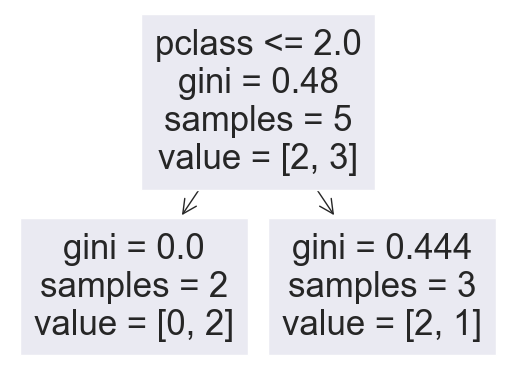

In [13]:
### GRADED

dtree_graph = ''

### BEGIN SOLUTION
dtree = DecisionTreeClassifier(max_depth = 1).fit(titanic.drop('survived', axis = 1), titanic.survived)
dtree_graph = plot_tree(dtree, feature_names=titanic.drop('survived', axis = 1).columns)
### END SOLUTION

# Answer check
dtree_graph;

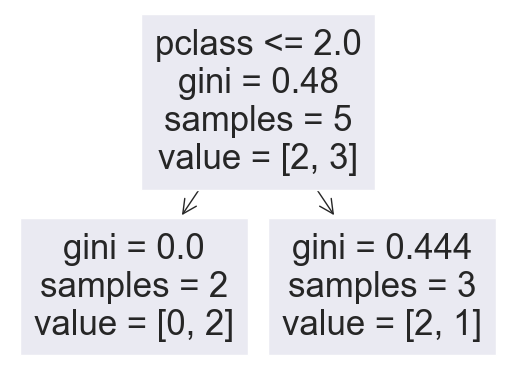

In [14]:
### BEGIN HIDDEN TESTS
dtree_ = DecisionTreeClassifier(max_depth = 1).fit(titanic.drop('survived', axis = 1), titanic.survived)
dtree_graph_ = plot_tree(dtree_, feature_names=titanic.drop('survived', axis = 1).columns)
#
#
#
for stu, ans in zip(dtree_graph, dtree_graph_):
    assert stu.get_text() == ans.get_text()
### END HIDDEN TESTS